In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
titanic_df = pd.read_csv('./data/train.csv')
titanic_df.drop(columns=['Name','PassengerId','Ticket','SibSp','Embarked','Cabin'], inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,male,22.0,0,7.2500
1,1,1,female,38.0,0,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,0,53.1000
4,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000
887,1,1,female,19.0,0,30.0000
888,0,3,female,NaN,2,23.4500
889,1,1,male,26.0,0,30.0000


In [5]:
X = titanic_df.copy()
y=titanic_df['Survived']
X.drop('Survived',axis=1, inplace= True)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imputer.fit_transform(X[['Age']])
newX = pd.DataFrame(imp,columns=['Age'])
X.drop(columns='Age', inplace=True)
X = pd.concat(objs=[X,newX],axis=1)
X

c:\Users\Chris\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


,Pclass,Sex,Parch,Fare,Age
0,3,male,0,7.2500,22.0
1,1,female,0,71.2833,38.0
2,3,female,0,7.9250,26.0
3,1,female,0,53.1000,35.0
4,3,male,0,8.0500,35.0
...,...,...,...,...,...
886,2,male,0,13.0000,27.0
887,1,female,0,30.0000,19.0
888,3,female,2,23.4500,24.0
889,1,male,0,30.0000,26.0


In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
conv = make_column_transformer((OrdinalEncoder(), ['Sex']), remainder='passthrough')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train_fe = conv.fit_transform(X_train)
X_test_fe = conv.transform(X_test)

In [11]:
col = ['Sex', 'Pclass', 'Parch', 'Fare', 'Age']

In [12]:
X_train_df = pd.DataFrame(X_train_fe, columns=col)
X_train_df

,Sex,Pclass,Parch,Fare,Age
0,1.0,1.0,0.0,25.5875,47.0
1,1.0,1.0,1.0,29.7000,37.0
2,1.0,2.0,0.0,13.0000,30.0
3,1.0,3.0,0.0,19.9667,24.0
4,1.0,3.0,0.0,7.2500,47.0
...,...,...,...,...,...
707,1.0,2.0,0.0,10.5000,31.0
708,1.0,3.0,1.0,29.1250,7.0
709,0.0,2.0,0.0,26.0000,29.0
710,1.0,3.0,0.0,7.7333,21.0


In [13]:
X_test_df = pd.DataFrame(X_test_fe, columns=col)
X_test_df

,Sex,Pclass,Parch,Fare,Age
0,0.0,1.0,2.0,26.2833,19.0
1,0.0,1.0,0.0,49.5042,24.0
2,1.0,3.0,0.0,7.2500,20.5
3,1.0,2.0,0.0,13.0000,23.0
4,1.0,2.0,1.0,37.0042,31.0
...,...,...,...,...,...
174,1.0,2.0,0.0,26.0000,54.0
175,0.0,1.0,0.0,52.0000,35.0
176,1.0,3.0,0.0,24.1500,24.0
177,0.0,1.0,0.0,78.8500,26.0


In [14]:
X_train_fe = conv.fit_transform(X_train)
X_test_fe = conv.transform(X_test)

In [15]:
m = RandomForestClassifier(max_depth=4, n_estimators=1000)

In [16]:
m.fit(X_train_df, y_train)

RandomForestClassifier(max_depth=4, n_estimators=1000)

In [17]:

ypredtr = m.predict(X_train_df)
ypredte = m.predict(X_test_df)

In [18]:
accuracy_score(ypredtr, y_train), accuracy_score(ypredte, y_test)

(0.8412921348314607, 0.8156424581005587)

<AxesSubplot:xlabel='feature'>

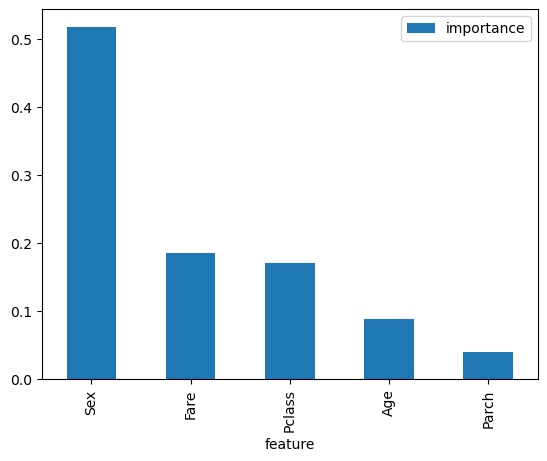

In [20]:
fi = pd.DataFrame({'feature': list(X_train_df.columns),
                   'importance': m.feature_importances_}).sort_values('importance', ascending = False)
fi.set_index(['feature']).plot.bar()